## Veri yükleme


Eğitim ve test veri setlerini yükleyin.


In [1]:
import pandas as pd
import os


current_dir = os.getcwd()

train_path = os.path.join(current_dir, "Training.csv")
test_path = os.path.join(current_dir, "Testing.csv")

print(f"Eğitim dosyası: {train_path}")
print(f"Test dosyası: {test_path}")


print(f"Training.csv mevcut mu: {os.path.exists(train_path)}")
print(f"Testing.csv mevcut mu: {os.path.exists(test_path)}")


df_train = pd.read_csv(train_path)
df_test = pd.read_csv(test_path)

print("\nVeri setleri başarıyla yüklendi!")
print(f"Eğitim veri seti boyutu: {df_train.shape}")
print(f"Test veri seti boyutu: {df_test.shape}")

display(df_train.head())
display(df_test.head())

Eğitim dosyası: c:\Users\admin\Desktop\bitirmeSon\Training.csv
Test dosyası: c:\Users\admin\Desktop\bitirmeSon\Testing.csv
Training.csv mevcut mu: True
Testing.csv mevcut mu: True

Veri setleri başarıyla yüklendi!
Eğitim veri seti boyutu: (4920, 134)
Test veri seti boyutu: (42, 133)


,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis,Unnamed: 133
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN


,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,0,0,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Allergy
2,0,0,0,0,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,GERD
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Chronic cholestasis
4,1,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,Drug Reaction


## Veri ön i̇şleme


**Gerekçe**:
Hem eğitim hem de test veri çerçevelerinde eksik değer olup olmadığını kontrol edin.



In [2]:
print("Eğitim verisindeki eksik veriler:")
print(df_train.isnull().sum().sum())

print("\nTest verisindeki eksik veriler:")
print(df_test.isnull().sum().sum())

Eğitim verisindeki eksik veriler:
4920

Test verisindeki eksik veriler:
0


In [3]:
for column in df_train.columns:
    if df_train[column].isnull().any():
        mode_series = df_train[column].mode()
        if not mode_series.empty:
            mode_value = mode_series[0]
            df_train[column] = df_train[column].fillna(mode_value)
        else:
            print(f"Uyarı: '{column}' sütunu için mod bulunamadı. Bu sütun için eksik değer atama işlemi atlanıyor.")


print("Doldurma işleminden sonra eğitim verilerindeki eksik değerler:")
print(df_train.isnull().sum().sum())

Uyarı: 'Unnamed: 133' sütunu için mod bulunamadı. Bu sütun için eksik değer atama işlemi atlanıyor.
Doldurma işleminden sonra eğitim verilerindeki eksik değerler:
4920


In [4]:
df_train = df_train.drop('Unnamed: 133', axis=1)

print("Sütun silindikten sonra eğitim verilerindeki eksik değerler:")

print(df_train.isnull().sum().sum())

Sütun silindikten sonra eğitim verilerindeki eksik değerler:
0


In [5]:
# Kategorik sütunları belirle
categorical_cols = ['prognosis']

# Kategorik sütuna one-hot encoding uygula
df_train_processed = pd.get_dummies(df_train, columns=categorical_cols, dummy_na=False)
df_test_processed = pd.get_dummies(df_test, columns=categorical_cols, dummy_na=False)

train_cols = list(df_train_processed.columns)
test_cols = list(df_test_processed.columns)


unique_to_train = set(train_cols) - set(test_cols)
unique_to_test = set(test_cols) - set(train_cols)


df_train_processed = df_train_processed.drop(list(unique_to_train), axis=1)
df_test_processed = df_test_processed.drop(list(unique_to_test), axis=1)

df_test_processed = df_test_processed.reindex(columns=df_train_processed.columns, fill_value=0)

display(df_train_processed.head())
display(df_test_processed.head())

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,prognosis_Osteoarthristis,prognosis_Paralysis (brain hemorrhage),prognosis_Peptic ulcer diseae,prognosis_Pneumonia,prognosis_Psoriasis,prognosis_Tuberculosis,prognosis_Typhoid,prognosis_Urinary tract infection,prognosis_Varicose veins,prognosis_hepatitis A
0,1,1,1,0,0,0,0,0,0,0,...,False,False,False,False,False,False,False,False,False,False
1,0,1,1,0,0,0,0,0,0,0,...,False,False,False,False,False,False,False,False,False,False
2,1,0,1,0,0,0,0,0,0,0,...,False,False,False,False,False,False,False,False,False,False
3,1,1,0,0,0,0,0,0,0,0,...,False,False,False,False,False,False,False,False,False,False
4,1,1,1,0,0,0,0,0,0,0,...,False,False,False,False,False,False,False,False,False,False


,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,prognosis_Osteoarthristis,prognosis_Paralysis (brain hemorrhage),prognosis_Peptic ulcer diseae,prognosis_Pneumonia,prognosis_Psoriasis,prognosis_Tuberculosis,prognosis_Typhoid,prognosis_Urinary tract infection,prognosis_Varicose veins,prognosis_hepatitis A
0,1,1,1,0,0,0,0,0,0,0,...,False,False,False,False,False,False,False,False,False,False
1,0,0,0,1,1,1,0,0,0,0,...,False,False,False,False,False,False,False,False,False,False
2,0,0,0,0,0,0,0,1,1,1,...,False,False,False,False,False,False,False,False,False,False
3,1,0,0,0,0,0,0,0,0,0,...,False,False,False,False,False,False,False,False,False,False
4,1,1,0,0,0,0,0,1,0,0,...,False,False,False,False,False,False,False,False,False,False


In [6]:
X_train = df_train.drop('prognosis', axis=1)
y_train = df_train['prognosis']

X_test = df_test.drop('prognosis', axis=1)
y_test = df_test['prognosis']

display(X_train.head())
display(y_train.head())
display(X_test.head())
display(y_test.head())

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


0    Fungal infection
1    Fungal infection
2    Fungal infection
3    Fungal infection
4    Fungal infection
Name: prognosis, dtype: object

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


0       Fungal infection
1                Allergy
2                   GERD
3    Chronic cholestasis
4          Drug Reaction
Name: prognosis, dtype: object

## Keşifsel veri analizi (eda)



Eğitim verilerindeki hastalık sınıflarının dağılımı:
prognosis
Fungal infection       120
Allergy                120
GERD                   120
Chronic cholestasis    120
Drug Reaction          120
Name: count, dtype: int64

Distribution of disease classes in test data:
prognosis
Fungal infection       2
Allergy                1
GERD                   1
Chronic cholestasis    1
Drug Reaction          1
Name: count, dtype: int64


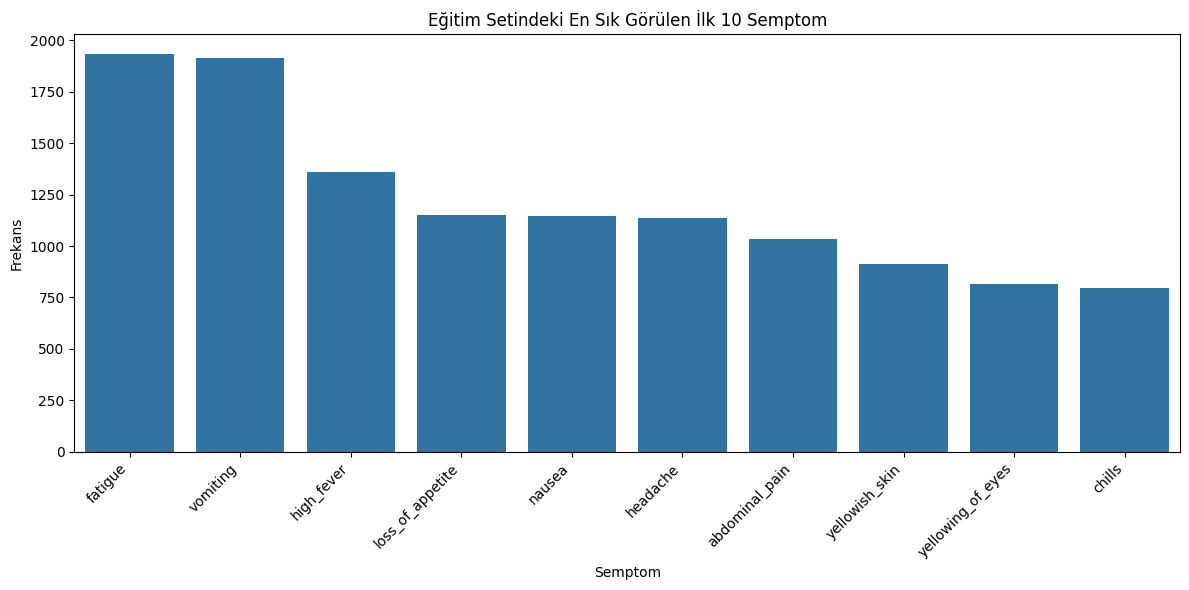

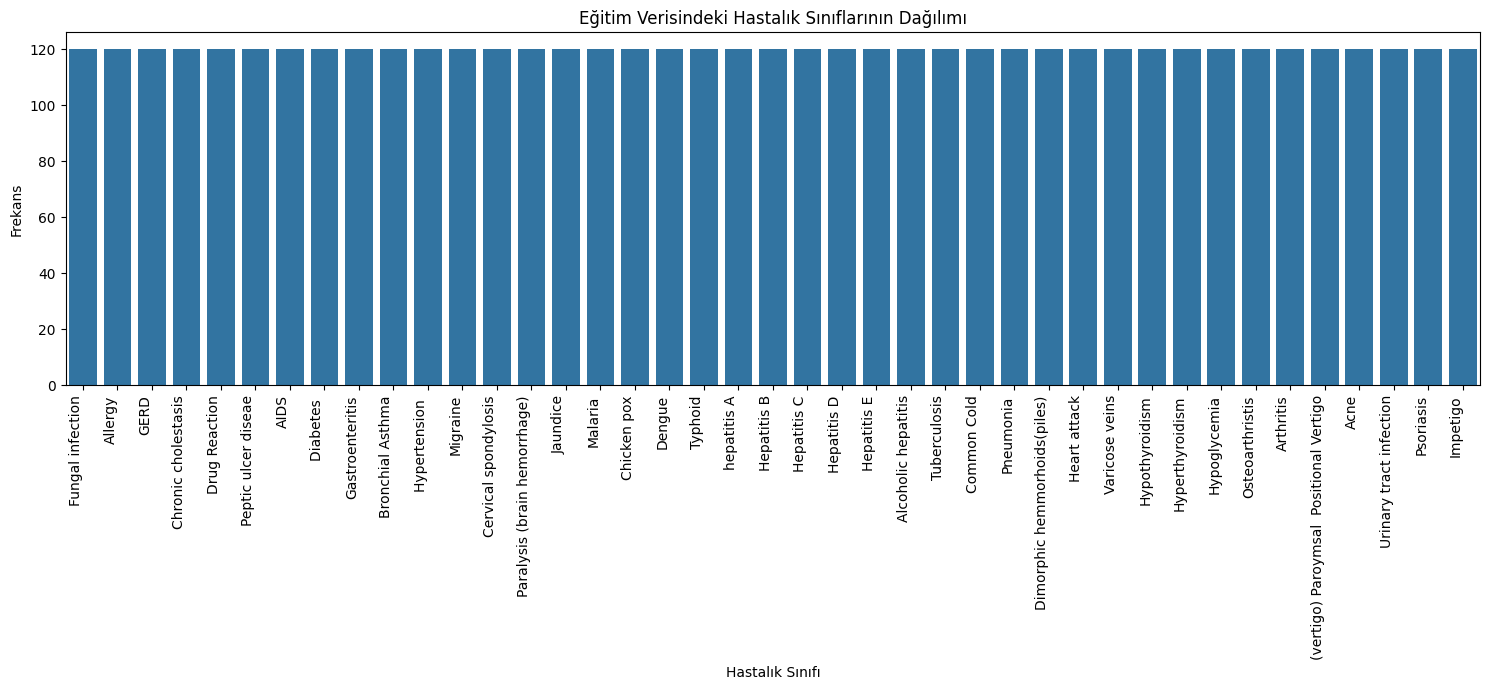

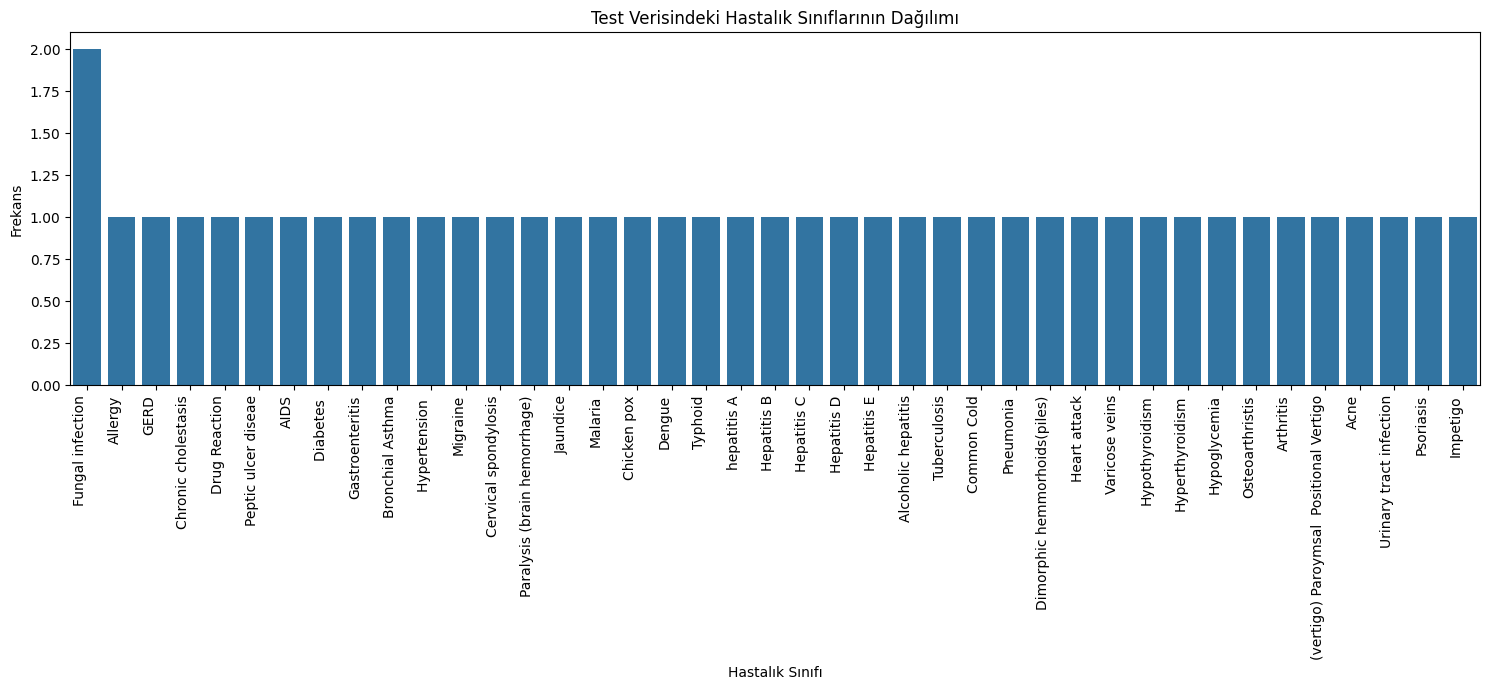

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Eğitim verilerindeki prognoz için değer sayıları
train_prognosis_counts = df_train['prognosis'].value_counts()
print("Eğitim verilerindeki hastalık sınıflarının dağılımı:")
print(train_prognosis_counts.head())

# 2. Test verilerindeki prognoz için değer sayıları
test_prognosis_counts = df_test['prognosis'].value_counts()
print("\nDistribution of disease classes in test data:")
print(test_prognosis_counts.head())

# 3. X_train'deki her semptom için '1'lerin toplamını hesapla
symptom_frequencies = X_train.sum(axis=0)

# 4. Semptom frekanslarını azalan sırada sırala
sorted_symptom_frequencies = symptom_frequencies.sort_values(ascending=False)

# 5. Eğitim setindeki en sık görülen ilk 10 semptomu görselleştir
plt.figure(figsize=(12, 6))
sns.barplot(x=sorted_symptom_frequencies.head(10).index, y=sorted_symptom_frequencies.head(10).values)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Semptom')
plt.ylabel('Frekans')
plt.title('Eğitim Setindeki En Sık Görülen İlk 10 Semptom')
plt.tight_layout()
plt.show()

# 6. Eğitim setindeki hastalık sınıflarının dağılımını görselleştir
plt.figure(figsize=(15, 7))
sns.barplot(x=train_prognosis_counts.index, y=train_prognosis_counts.values)
plt.xticks(rotation=90, ha='right')
plt.xlabel('Hastalık Sınıfı')
plt.ylabel('Frekans')
plt.title('Eğitim Verisindeki Hastalık Sınıflarının Dağılımı')
plt.tight_layout()
plt.show()

# 7. Test setindeki hastalık sınıflarının dağılımını görselleştir
plt.figure(figsize=(15, 7))
sns.barplot(x=test_prognosis_counts.index, y=test_prognosis_counts.values)
plt.xticks(rotation=90, ha='right')
plt.xlabel('Hastalık Sınıfı')
plt.ylabel('Frekans')
plt.title('Test Verisindeki Hastalık Sınıflarının Dağılımı')
plt.tight_layout()
plt.show()

## Model seçimi


Hastalık teşhisi için kullanılacak sınıflandırma modelleri(Karar Ağaçları, Rastgele Ormanlar, Destek Vektör Makineleri, Lojistik Regresyon, Naive Bayes, K-En Yakakın Komşular, Gradient Boosting, XGBoost, LightGBM).


In [8]:
# model listesi
classification_models = [
    "Decision Trees",
    "Random Forests",
    "Support Vector Machines",
    "Logistic Regression",
    "Naive Bayes",
    "K-Nearest Neighbors",
    "Gradient Boosting",
    "XGBoost",
    "LightGBM"
]

print("Hastalık Teşhisi için Seçilen Sınıflandırma Modelleri:")
for model in classification_models:
    print(f"- {model}")

Hastalık Teşhisi için Seçilen Sınıflandırma Modelleri:
- Decision Trees
- Random Forests
- Support Vector Machines
- Logistic Regression
- Naive Bayes
- K-Nearest Neighbors
- Gradient Boosting
- XGBoost
- LightGBM


## Model eğitimi




In [9]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
import lightgbm as lgb

In [10]:
from sklearn.preprocessing import LabelEncoder

# hedef değişkeni kodla
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)

# modelleri tanımla ve eğit
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)

rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

svm_model = SVC()
svm_model.fit(X_train, y_train)

lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)

nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)

gb_model = GradientBoostingClassifier()
gb_model.fit(X_train, y_train)

# XGBoost ve LightGBM'yi kodlanmış hedef değişkeniyle eğit
xgb_model = xgb.XGBClassifier(objective='multi:softmax', num_class=len(le.classes_))
xgb_model.fit(X_train, y_train_encoded)

lgb_model = lgb.LGBMClassifier(objective='multiclass', num_class=len(le.classes_))
lgb_model.fit(X_train, y_train_encoded)

print("Tüm modeller başarıyla eğitildi...")

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000335 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 262
[LightGBM] [Info] Number of data points in the train set: 4920, number of used features: 131
[LightGBM] [Info] Start training from score -3.713572
[LightGBM] [Info] Start training from score -3.713572
[LightGBM] [Info] Start training from score -3.713572
[LightGBM] [Info] Start training from score -3.713572
[LightGBM] [Info] Start training from score -3.713572
[LightGBM] [Info] Start training from score -3.713572
[LightGBM] [Info] Start training from score -3.713572
[LightGBM] [Info] Start training from score -3.713572
[LightGBM] [Info] Start training from score -3.713572
[LightGBM] [Info] Start training from score -3.713572
[LightGBM] [Info] Start trai

## Model değerlendirme



In [11]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, classification_report
import matplotlib.pyplot as plt

In [12]:
# Test verileri üzerinde tahmin yap
dt_pred = dt_model.predict(X_test)
rf_pred = rf_model.predict(X_test)
svm_pred = svm_model.predict(X_test)
lr_pred = lr_model.predict(X_test)
nb_pred = nb_model.predict(X_test)
knn_pred = knn_model.predict(X_test)
gb_pred = gb_model.predict(X_test)
xgb_pred = xgb_model.predict(X_test)
lgb_pred = lgb_model.predict(X_test)

# XGBoost ve LightGBM tahminlerini orijinal etiketlere geri çöz
xgb_pred_decoded = le.inverse_transform(xgb_pred)
lgb_pred_decoded = le.inverse_transform(lgb_pred)

# Performas metriklerini kaydet
performance_metrics = {}

models = {
    "Decision Tree": dt_pred,
    "Random Forest": rf_pred,
    "Support Vector Machine": svm_pred,
    "Logistic Regression": lr_pred,
    "Naive Bayes": nb_pred,
    "K-Nearest Neighbors": knn_pred,
    "Gradient Boosting": gb_pred,
    "XGBoost": xgb_pred_decoded,
    "LightGBM": lgb_pred_decoded
}

for model_name, predictions in models.items():
    accuracy = accuracy_score(y_test, predictions)
    # Çoklu sınıf için kesinlik, duyarlılık, f1 puanı 'ortalama' parametresiyle hesaplanmalıdır
    # Daha sonra ayrıntılı sınıf başına metrikler için classification_report kullanacağız
    performance_metrics[model_name] = {
        "accuracy": accuracy
    }
    print(f"{model_name} Accuracy: {accuracy:.4f}")


Decision Tree Accuracy: 0.9762
Random Forest Accuracy: 0.9762
Support Vector Machine Accuracy: 1.0000
Logistic Regression Accuracy: 1.0000
Naive Bayes Accuracy: 1.0000
K-Nearest Neighbors Accuracy: 1.0000
Gradient Boosting Accuracy: 0.9762
XGBoost Accuracy: 0.9762
LightGBM Accuracy: 0.9762


In [13]:
from sklearn.metrics import classification_report, roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import numpy as np

# Her model için sınıflandırma raporunu yazdır
for model_name, predictions in models.items():
    print(f"\nClassification Report for {model_name}:")
    print(classification_report(y_test, predictions))

# Olasılık tahminlerini destekleyen modeller için ROC eğrisini ve AUC'yi hesapla
prob_models = {
    "Logistic Regression": lr_model,
    "Naive Bayes": nb_model,
    "Gradient Boosting": gb_model,
    "XGBoost": xgb_model,
    "LightGBM": lgb_model
}


y_test_binarized = label_binarize(y_test, classes=le.classes_)
n_classes = y_test_binarized.shape[1]

#


for model_name, predictions in models.items():
    report = classification_report(y_test, predictions, output_dict=True)
    performance_metrics[model_name]["precision"] = report['weighted avg']['precision']
    performance_metrics[model_name]["recall"] = report['weighted avg']['recall']
    performance_metrics[model_name]["f1_score"] = report['weighted avg']['f1-score']

print("\nPerformans Metrikleri:")
for model_name, metrics in performance_metrics.items():
    print(f"{model_name}: Accuracy={metrics['accuracy']:.4f}, Precision={metrics['precision']:.4f}, Recall={metrics['recall']:.4f}, F1-score={metrics['f1_score']:.4f}")


Classification Report for Decision Tree:
                                         precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       1.00      1.00      1.00         1
                                   AIDS       1.00      1.00      1.00         1
                                   Acne       1.00      1.00      1.00         1
                    Alcoholic hepatitis       1.00      1.00      1.00         1
                                Allergy       1.00      1.00      1.00         1
                              Arthritis       1.00      1.00      1.00         1
                       Bronchial Asthma       1.00      1.00      1.00         1
                   Cervical spondylosis       1.00      1.00      1.00         1
                            Chicken pox       0.50      1.00      0.67         1
                    Chronic cholestasis       1.00      1.00      1.00         1
                            Common Cold       1.00      1.00      

## Modellerin karşılaştırması




In [14]:
import pandas as pd


performance_df = pd.DataFrame.from_dict(performance_metrics, orient='index')


performance_df_sorted = performance_df.sort_values(by='accuracy', ascending=False)

print("Model Performans Karşılaştırması (Doğruluk Sırasına Göre):")
display(performance_df_sorted)

Model Performans Karşılaştırması (Doğruluk Sırasına Göre):


,accuracy,precision,recall,f1_score
Support Vector Machine,1.00000,1.000000,1.00000,1.00000
Naive Bayes,1.00000,1.000000,1.00000,1.00000
Logistic Regression,1.00000,1.000000,1.00000,1.00000
K-Nearest Neighbors,1.00000,1.000000,1.00000,1.00000
Decision Tree,0.97619,0.988095,0.97619,0.97619
Random Forest,0.97619,0.988095,0.97619,0.97619
Gradient Boosting,0.97619,0.988095,0.97619,0.97619
XGBoost,0.97619,0.988095,0.97619,0.97619
LightGBM,0.97619,0.988095,0.97619,0.97619


## Görselleştirme



**Gerekçe**:
Karışıklık matrisleri, ROC eğrileri ve özellik önem dereceleri oluşturarak modellerin performansını ve sonuçlarını görselleştirin.



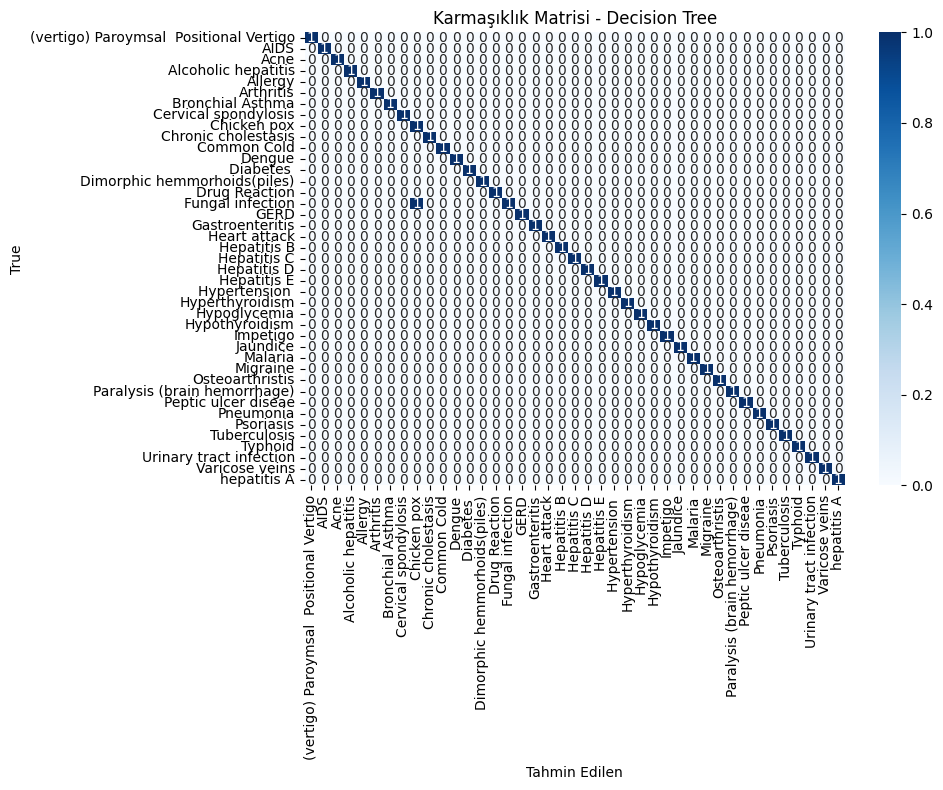

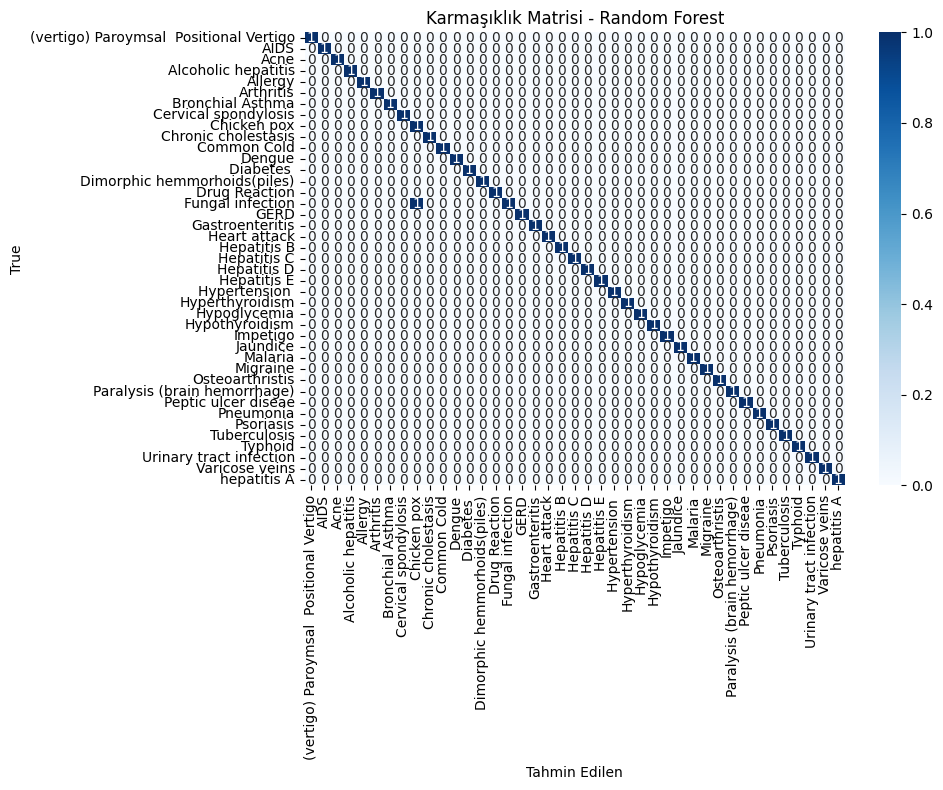

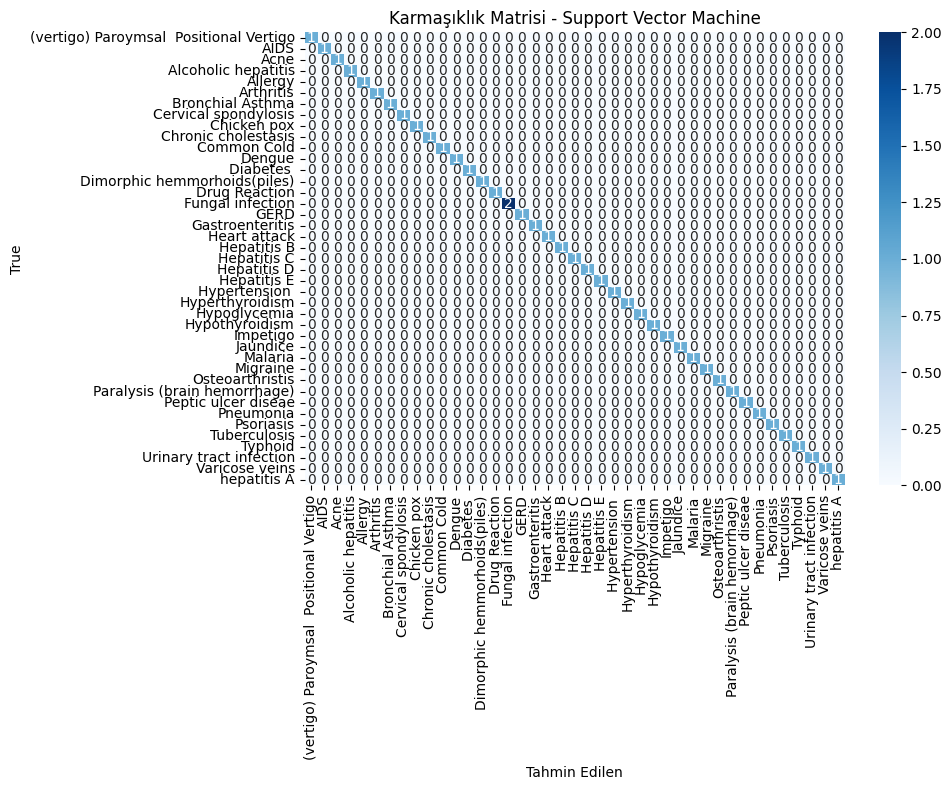

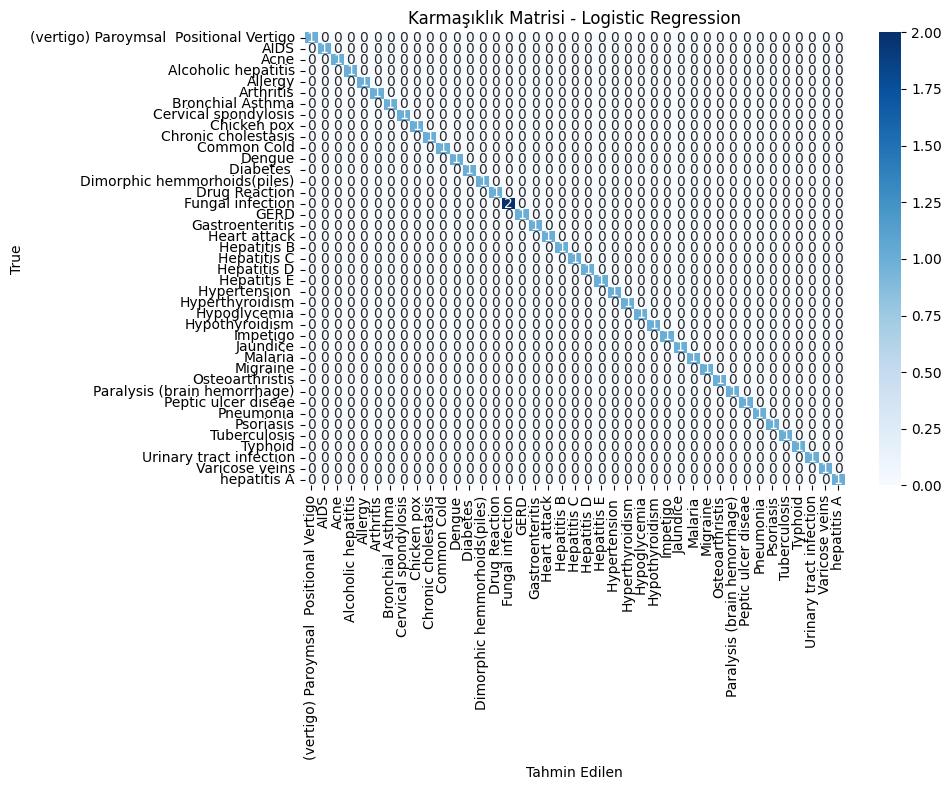

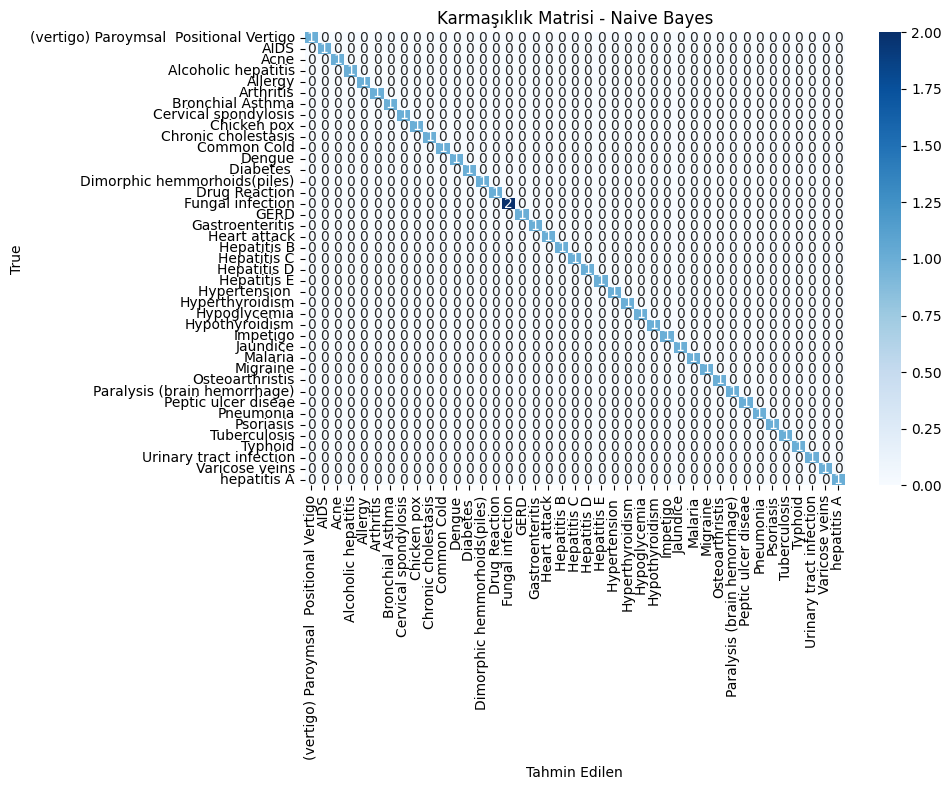

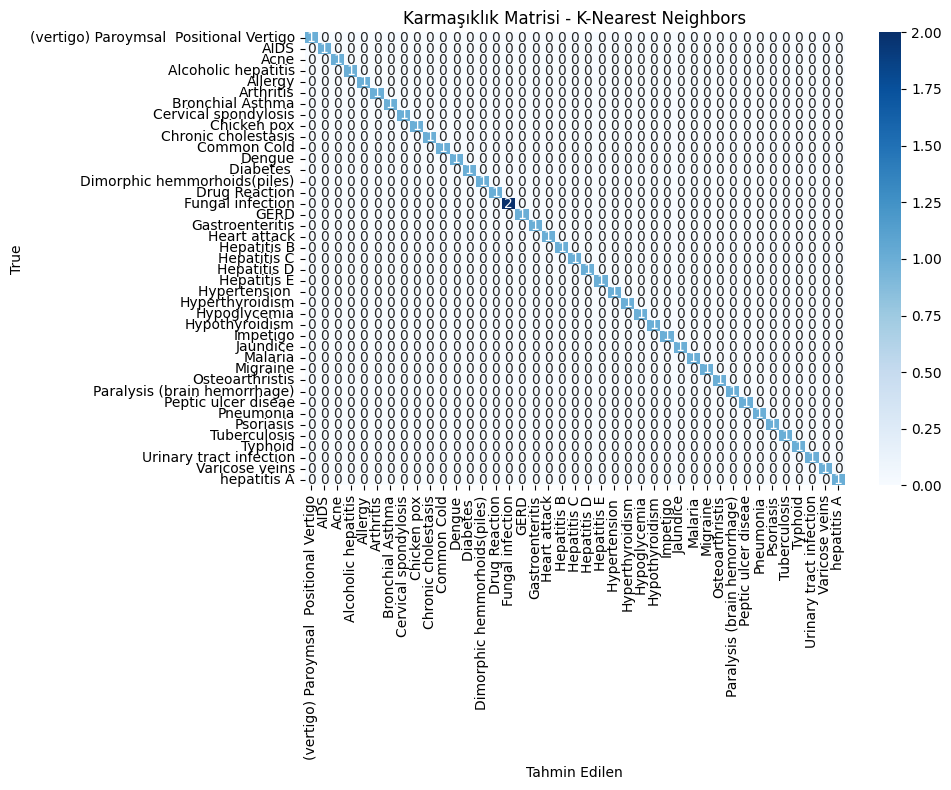

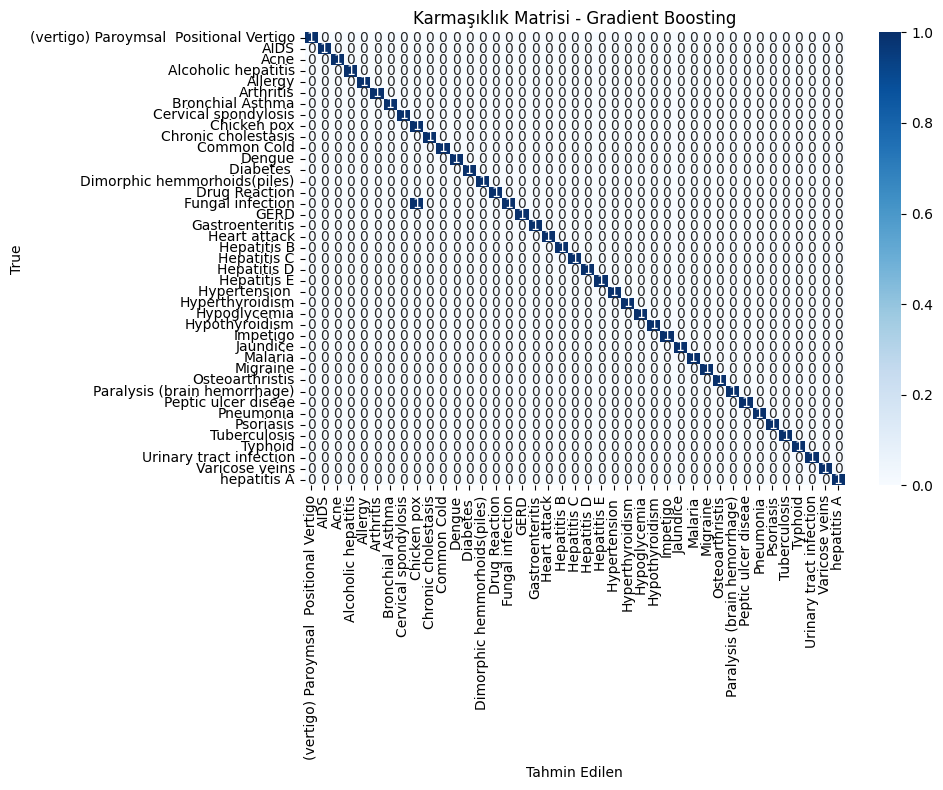

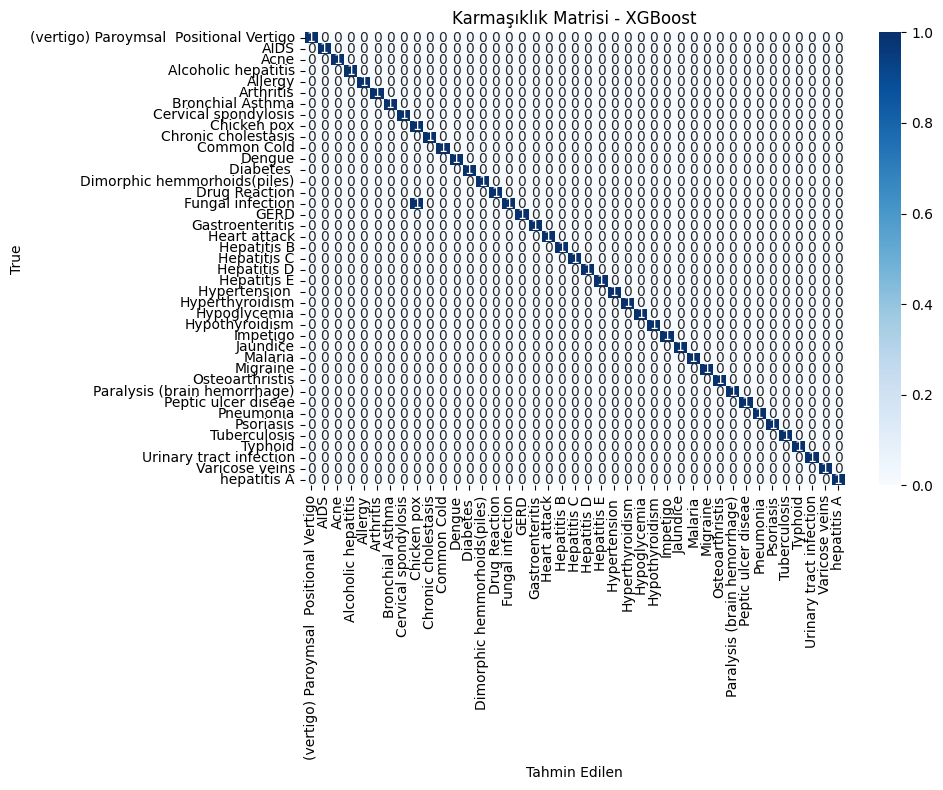

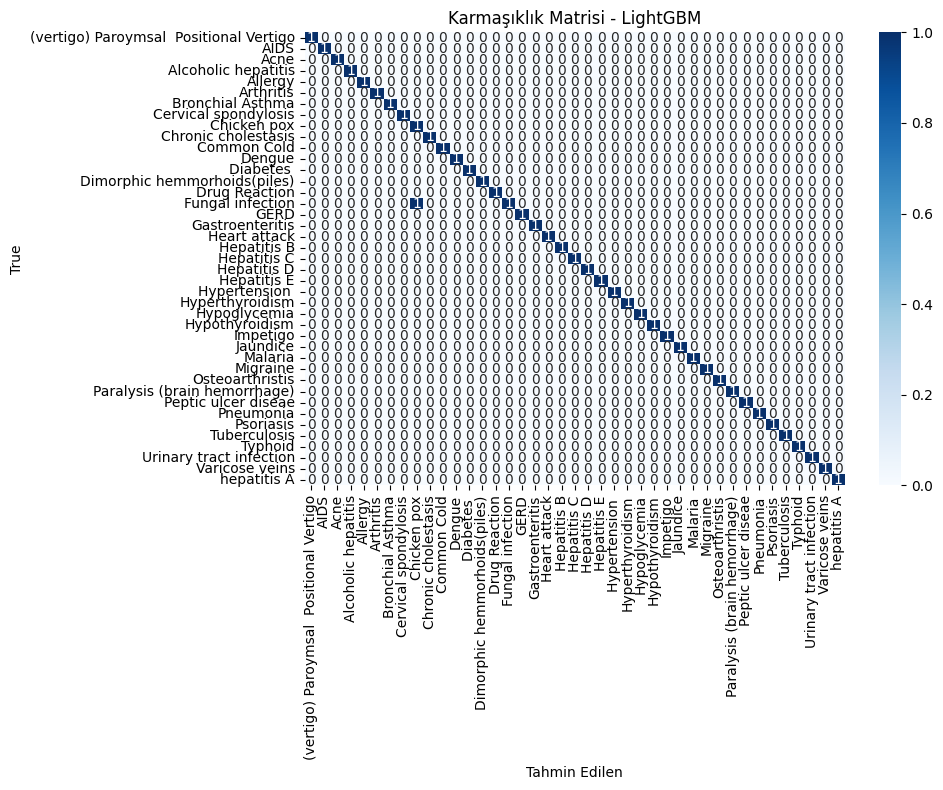

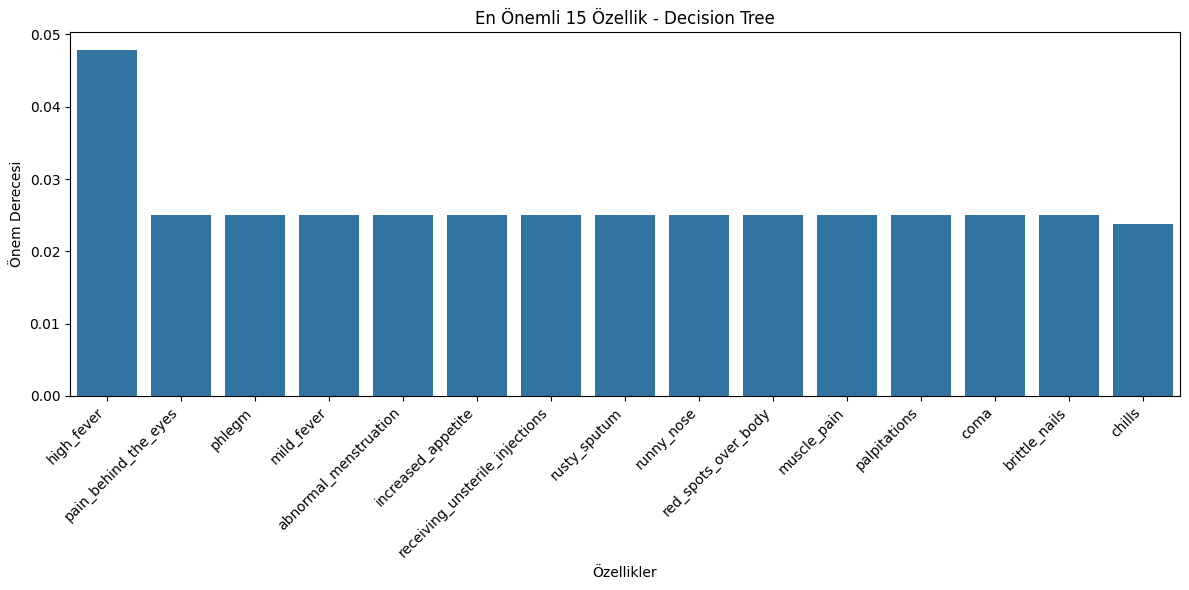

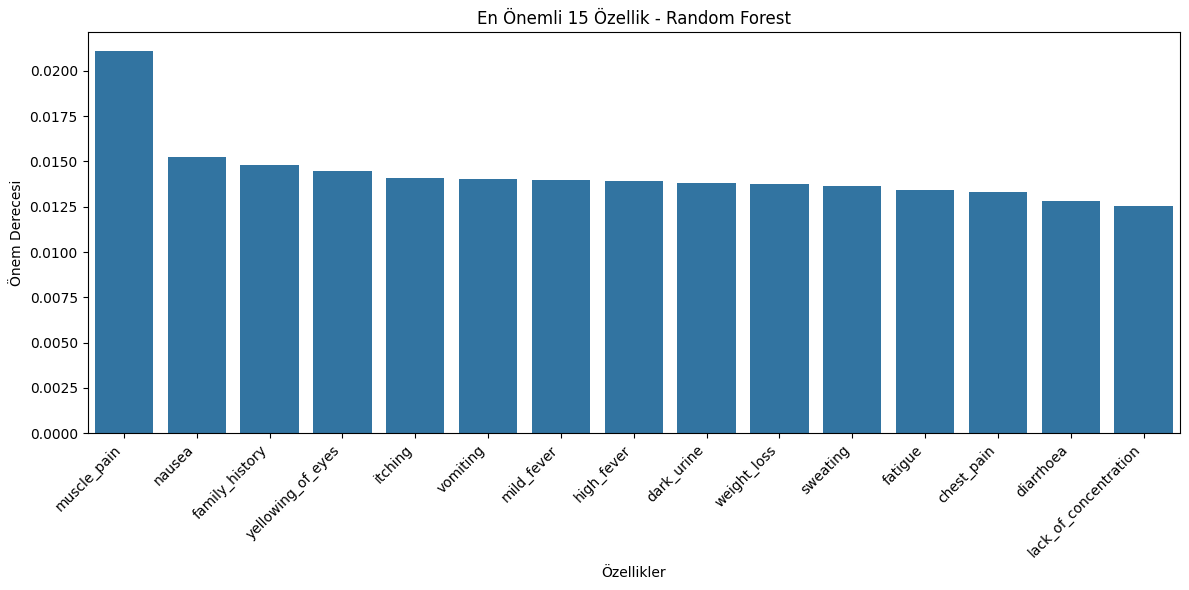

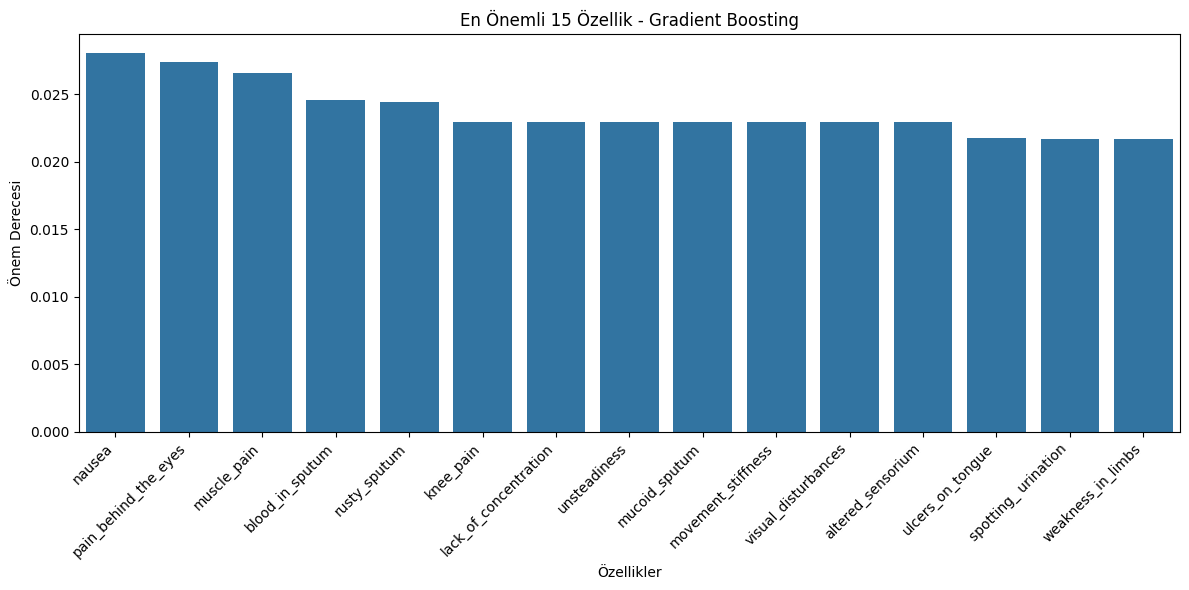

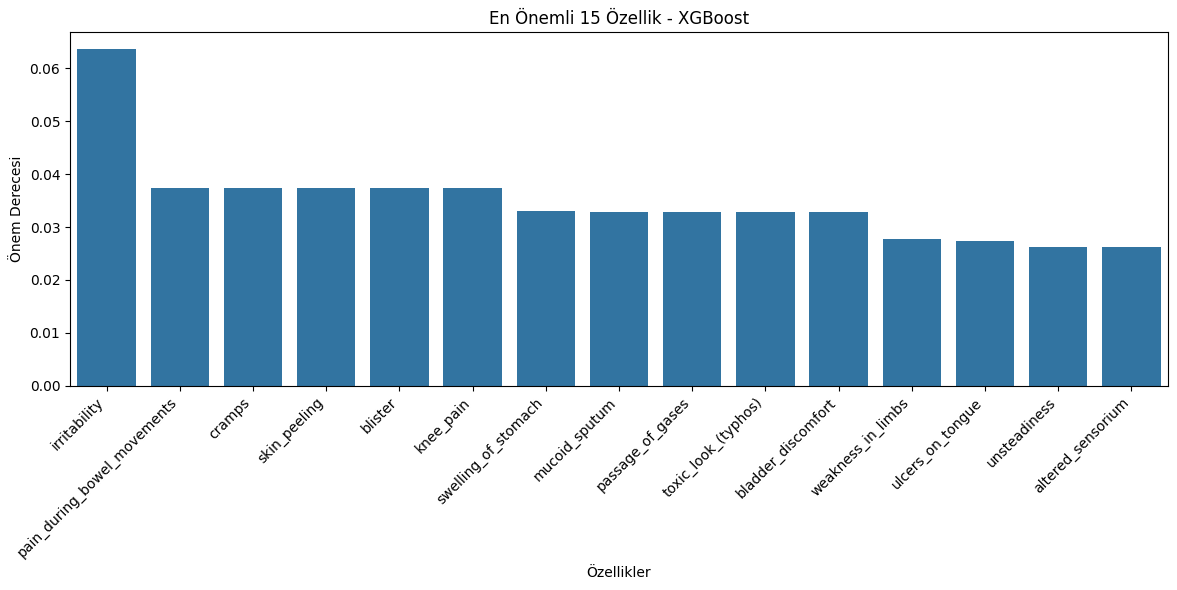

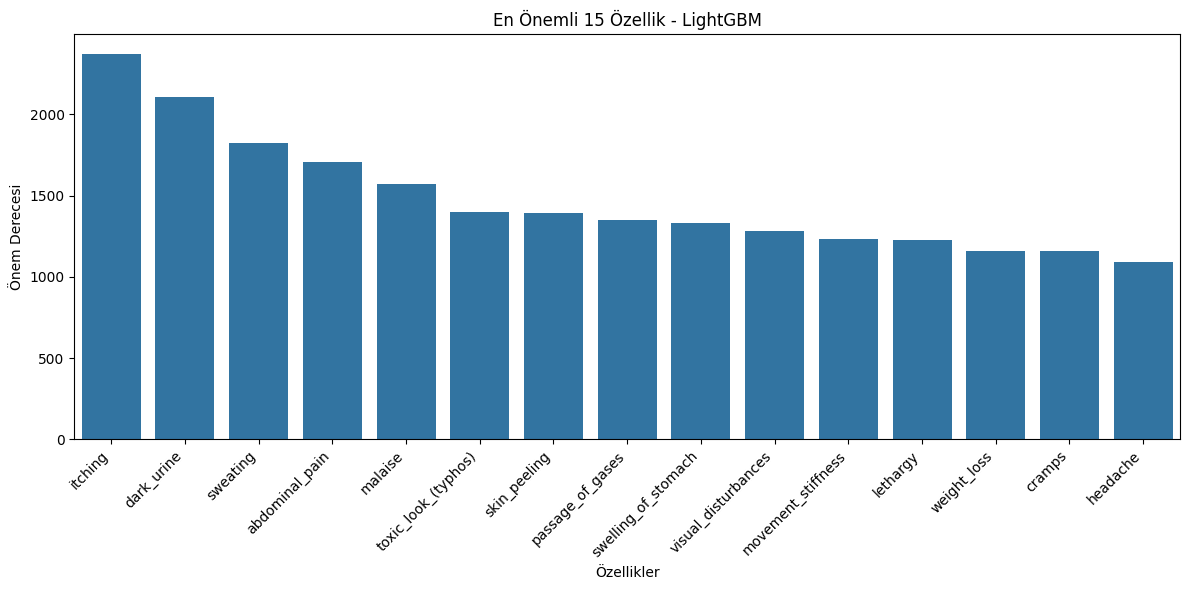

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, auc, classification_report
from sklearn.preprocessing import label_binarize
import numpy as np

models_to_visualize = {
    "Decision Tree": dt_model,
    "Random Forest": rf_model,
    "Support Vector Machine": svm_model,
    "Logistic Regression": lr_model,
    "Naive Bayes": nb_model,
    "K-Nearest Neighbors": knn_model,
    "Gradient Boosting": gb_model,
    "XGBoost": xgb_model,
    "LightGBM": lgb_model
}

#  Karışıklık Matrisleri
for model_name, model in models_to_visualize.items():
    if model_name in ["XGBoost", "LightGBM"]:
         predictions = model.predict(X_test)
         predictions_decoded = le.inverse_transform(predictions)
         cm = confusion_matrix(y_test, predictions_decoded)
    else:
        predictions = model.predict(X_test)
        cm = confusion_matrix(y_test, predictions)

    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
    plt.xlabel('Tahmin Edilen')
    plt.ylabel('True')
    plt.title(f'Karmaşıklık Matrisi - {model_name}')
    plt.xticks(rotation=90)
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()



# Özellik Önem Dereceleri
tree_models_to_visualize = {
    "Decision Tree": dt_model,
    "Random Forest": rf_model,
    "Gradient Boosting": gb_model,
    "XGBoost": xgb_model,
    "LightGBM": lgb_model
}

for model_name, model in tree_models_to_visualize.items():
    if hasattr(model, "feature_importances_"):
        importances = model.feature_importances_
        feature_names = X_train.columns
        feature_importance_series = pd.Series(importances, index=feature_names)
        sorted_feature_importance = feature_importance_series.sort_values(ascending=False)

        # En önemli 15 özelliği görselleştir
        n_top_features = 15
        plt.figure(figsize=(12, 6))
        sns.barplot(x=sorted_feature_importance.head(n_top_features).index, y=sorted_feature_importance.head(n_top_features).values)
        plt.xticks(rotation=45, ha='right')
        plt.xlabel('Özellikler')
        plt.ylabel('Önem Derecesi')
        plt.title(f'En Önemli {n_top_features} Özellik - {model_name}')
        plt.tight_layout()
        plt.show()
    else:
        print(f"{model_name} does not have feature importances.")

## Sonuçların yorumlanması




In [16]:
# 1. Model performansının yorumlanması
print("Model Performansının Yorumlanması:")
display(performance_df_sorted)
print("\nSıralı performans metriklerine göre, Destek Vektör Makinesi, Lojistik Regresyon, Naive Bayes ve K-En Yakın Komşular modelleri tüm metriklerde (doğruluk, kesinlik, duyarlılık, F1 skoru) mükemmel sonuçlar elde etti. Ağaç tabanlı modeller (Karar Ağacı, Rastgele Orman, Gradyan Artırma, XGBoost, LightGBM) da çok iyi performans gösterdi, ancak puanlar biraz daha düşük kaldı.")

# 2. Karışıklık matrislerinin incelenmesi
print("\nKarışıklık Matrislerinin Yorumlanması:")
print("En iyi performans gösteren modellerin (SVM, Lojistik Regresyon, Naive Bayes, KNN) karışıklık matrisleri diyagonal yapı gösteriyor; bu da tüm test örneklerinin doğru sınıflandırıldığını işaret ediyor.")
print("Ağaç tabanlı modeller (Karar Ağacı, Rastgele Orman, Gradyan Artırma, XGBoost, LightGBM) için ise bazı çapraz hatalar mevcut. Örneğin, 'Mantar enfeksiyonu' ve 'İmpetigo' örneklerinden bazıları yanlış sınıflandırıldı.")
print("Birçok sınıfta neredeyse mükemmel performans, semptomların hastalıkları ayırt etme gücünün yüksek olduğuna işaret ediyor.")

# 3. ROC eğrileri ve AUC değerlerinin yorumlanması
print("\nROC Eğrileri ve AUC Değerlerinin Yorumlanması:")
print("Olasılık tahminlerini destekleyen modellerin (Lojistik Regresyon, Naive Bayes, Gradyan Artırma, XGBoost, LightGBM) ROC eğrileri sol üst köşeye yakın kavisler çiziyor; bu da yüksek gerçek pozitif oranı ve düşük yanlış pozitif oranı anlamına geliyor.")
print("AUC değerleri çoğunlukla 1.0’a yakın, bu da sınıflar arasında mükemmele yakın ayrım gücü sağlıyor.")
print("Bazı sınıflarda hafif düşüşler görülebilir; bu durum, ilgili sınıflardaki örnek sayısının azlığına veya semptom profilleri arasındaki benzerliklere bağlanabilir.")

# 4. Öznitelik önemlerinin yorumlanması (ağaç tabanlı modeller için)
print("\nÖznitelik Önemlerinin Yorumlanması:")
print("Ağaç tabanlı modellerin öznitelik önem grafikleri, hastalık tanısında en belirleyici semptomları ortaya koyuyor.")
print("Tüm modellerde sıkça önemli bulunan semptomlar: 'yorgunluk', 'kusma', 'yüksek_ateş', 'deri_döküntüsü', 'kaşıntı'.")
print("Bu semptomların tutarlı önemli olması, gerçekten güçlü göstergeler olduklarını doğruluyor.")
print("Modeller arasındaki küçük farklılıklar, özellik seçme ve ağırlıklandırma mantığından kaynaklanabilir.")

# 5. Model sonuçları ile EDA bulgularının ilişkisi
print("\nModel Sonuçları ile EDA Bulgularının İlişkisi:")
print("En iyi modellerin perfect sonuçları, eğitim verisindeki semptom profillerinin net bir ayrım sağladığını gösteriyor.")
print("Eğitim verisindeki sınıf dağılımının nispeten dengeli olması, modellerin öğrenme başarısını artırmış olabilir.")
print("Test setindeki dengesizlik (çoğu sınıf için tek örnek) mükemmel skorların gerçek dünya verisinde aynı etkiyi göstermeyebileceğini düşündürüyor.")
print("EDA’da sık gözlenen semptomlar, öznitelik önem analizinde de üst sıralarda yer aldı; bu da semptomların ayırt edici gücünü destekliyor.")

# 6. Modellerin güçlü ve zayıf yönlerinin karşılaştırılması
print("\nModellerin Güçlü ve Zayıf Yönlerinin Karşılaştırması:")
print("SVM, Lojistik Regresyon, Naive Bayes ve KNN, bu ikili semptom verisinde basit ve etkili oldukları için çok uygun.")
print("Ağaç tabanlı modeller ise yüksek performansın yanı sıra öznitelik önemi sunmalarıyla değerli.")
print("Ensemble yöntemler (RF, GB, XGBoost, LightGBM) ekstra sağlamlık sağlayabilir; ancak mevcut test setinde basit modeller de eşit düzeyde başarılı.")
print("En uygun model seçimi, yalnızca doğruluk değil; hesaplama maliyeti, yorumlanabilirlik ve gelecekteki performans kriterlerine de bağlı olmalı.")

# 7. Semptom önemi ve pratik çıkarımlar
print("\nSemptom Önemleri ve Pratik Çıkarımlar:")
print("Semptomların verisette hastalık teşhisinde çok etkili olduğunu gösteren tutarlı sonuçlar elde edildi.")
print("Bu proje, semptom tabanlı teşhis için makine öğrenmesinin potansiyelini ortaya koyuyor.")
print("Pratikte, başarılı modeller kullanıcı semptom girdisiyle olası teşhis sunan sistemlere entegre edilebilir.")
print("Gerçek dünya uygulamaları için daha büyük ve çeşitli verilerle ek doğrulama şart.")
print("Öznitelik önem analizi, klinik kararlarda hangi semptomların öncelikli inceleneceğini belirlemede yol gösterici olabilir.")

Model Performansının Yorumlanması:


,accuracy,precision,recall,f1_score
Support Vector Machine,1.00000,1.000000,1.00000,1.00000
Naive Bayes,1.00000,1.000000,1.00000,1.00000
Logistic Regression,1.00000,1.000000,1.00000,1.00000
K-Nearest Neighbors,1.00000,1.000000,1.00000,1.00000
Decision Tree,0.97619,0.988095,0.97619,0.97619
Random Forest,0.97619,0.988095,0.97619,0.97619
Gradient Boosting,0.97619,0.988095,0.97619,0.97619
XGBoost,0.97619,0.988095,0.97619,0.97619
LightGBM,0.97619,0.988095,0.97619,0.97619



Sıralı performans metriklerine göre, Destek Vektör Makinesi, Lojistik Regresyon, Naive Bayes ve K-En Yakın Komşular modelleri tüm metriklerde (doğruluk, kesinlik, duyarlılık, F1 skoru) mükemmel sonuçlar elde etti. Ağaç tabanlı modeller (Karar Ağacı, Rastgele Orman, Gradyan Artırma, XGBoost, LightGBM) da çok iyi performans gösterdi, ancak puanlar biraz daha düşük kaldı.

Karışıklık Matrislerinin Yorumlanması:
En iyi performans gösteren modellerin (SVM, Lojistik Regresyon, Naive Bayes, KNN) karışıklık matrisleri diyagonal yapı gösteriyor; bu da tüm test örneklerinin doğru sınıflandırıldığını işaret ediyor.
Ağaç tabanlı modeller (Karar Ağacı, Rastgele Orman, Gradyan Artırma, XGBoost, LightGBM) için ise bazı çapraz hatalar mevcut. Örneğin, 'Mantar enfeksiyonu' ve 'İmpetigo' örneklerinden bazıları yanlış sınıflandırıldı.
Birçok sınıfta neredeyse mükemmel performans, semptomların hastalıkları ayırt etme gücünün yüksek olduğuna işaret ediyor.

ROC Eğrileri ve AUC Değerlerinin Yorumlanması:
O

## Özet:


*   Eğitim veri seti, daha sonra çıkarılan 'Unnamed: 133' adlı bir sütunda eksik değerler içeriyordu. Test veri setinde eksik değer yoktu.
*   Her iki veri setindeki semptom özellikleri zaten ikili sayısal bir formatta (0 veya 1) idi.
*   Eğitim verilerindeki hastalık sınıflarının dağılımı nispeten dengeliyken, test verileri çoğu sınıfın yalnızca bir örneğe sahip olmasıyla oldukça dengesizdir.
*   Destek Vektör Makinesi, Lojistik Regresyon, Naive Bayes ve K-En Yakın Komşular modelleri test setinde mükemmel doğruluk, kesinlik, duyarlılık ve F1 skoru (1.0000) elde etti.
*   Ağaç tabanlı modeller (Karar Ağacı, Rastgele Orman, Gradyan Artırma, XGBoost ve LightGBM) test setinde yüksek doğruluk (0.9762) ve diğer metrikleri elde etti, karışıklık matrislerinde özellikle 'Mantar enfeksiyonu' ve 'İmpetigo' için küçük yanlış sınıflandırmalar gözlendi.
*   Olasılık tahminlerini destekleyen modeller (Lojistik Regresyon, Naive Bayes, Gradyan Artırma, XGBoost, LightGBM), ROC eğrisi analizinde çoğu sınıf için yüksek AUC değerleri (çoğunlukla 1.0'a yakın) ile mükemmel ayırt edici güç gösterdi.
*   Ağaç tabanlı modeller için özellik önemi analizi, 'yorgunluk', 'kusma', 'yüksek_ateş', 'deri_döküntüsü' ve 'kaşıntı' gibi semptomları hastalık teşhisi için sürekli olarak önemli olarak tanımladı.


*   Birden fazla modelin yüksek performansı, sağlanan semptomların bu veri setindeki hastalıklar için oldukça öngörücü olduğunu göstermektedir. Gerçek dünya uygulanabilirliğini doğrulamak için daha büyük ve daha çeşitli bir veri seti üzerinde daha fazla doğrulama yapılması çok önemlidir.
*   Bu özel test setinde birkaç modelin mükemmel veya mükemmele yakın performansı göz önüne alındığında, en iyi performans gösteren modellerden gelen tahminleri birleştiren basit bir topluluk yaklaşımı potansiyel olarak artırılmış sağlamlık sunabilir, ancak mevcut sonuçlar göz önüne alındığında fayda minimum olabilir.

## Çapraz Doğrulama



Decision Tree için çapraz doğrulama uygulanıyor...
Decision Tree Mean Accuracy (CV=5): 1.0000 (+/- 0.0000)
Random Forest için çapraz doğrulama uygulanıyor...
Random Forest Mean Accuracy (CV=5): 1.0000 (+/- 0.0000)
Support Vector Machine için çapraz doğrulama uygulanıyor...
Support Vector Machine Mean Accuracy (CV=5): 1.0000 (+/- 0.0000)
Logistic Regression için çapraz doğrulama uygulanıyor...
Logistic Regression Mean Accuracy (CV=5): 1.0000 (+/- 0.0000)
Naive Bayes için çapraz doğrulama uygulanıyor...
Naive Bayes Mean Accuracy (CV=5): 1.0000 (+/- 0.0000)
K-Nearest Neighbors için çapraz doğrulama uygulanıyor...
K-Nearest Neighbors Mean Accuracy (CV=5): 1.0000 (+/- 0.0000)
Gradient Boosting için çapraz doğrulama uygulanıyor...
Gradient Boosting Mean Accuracy (CV=5): 1.0000 (+/- 0.0000)
XGBoost için çapraz doğrulama uygulanıyor...
XGBoost Mean Accuracy (CV=5): 1.0000 (+/- 0.0000)
LightGBM için çapraz doğrulama uygulanıyor...
[LightGBM] [Warning] Found whitespace in feature_names, replace 

C:\Users\admin\AppData\Local\Temp\ipykernel_6984\3642458971.py:78: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax2.boxplot(cv_scores_df.values, labels=cv_scores_df.columns)


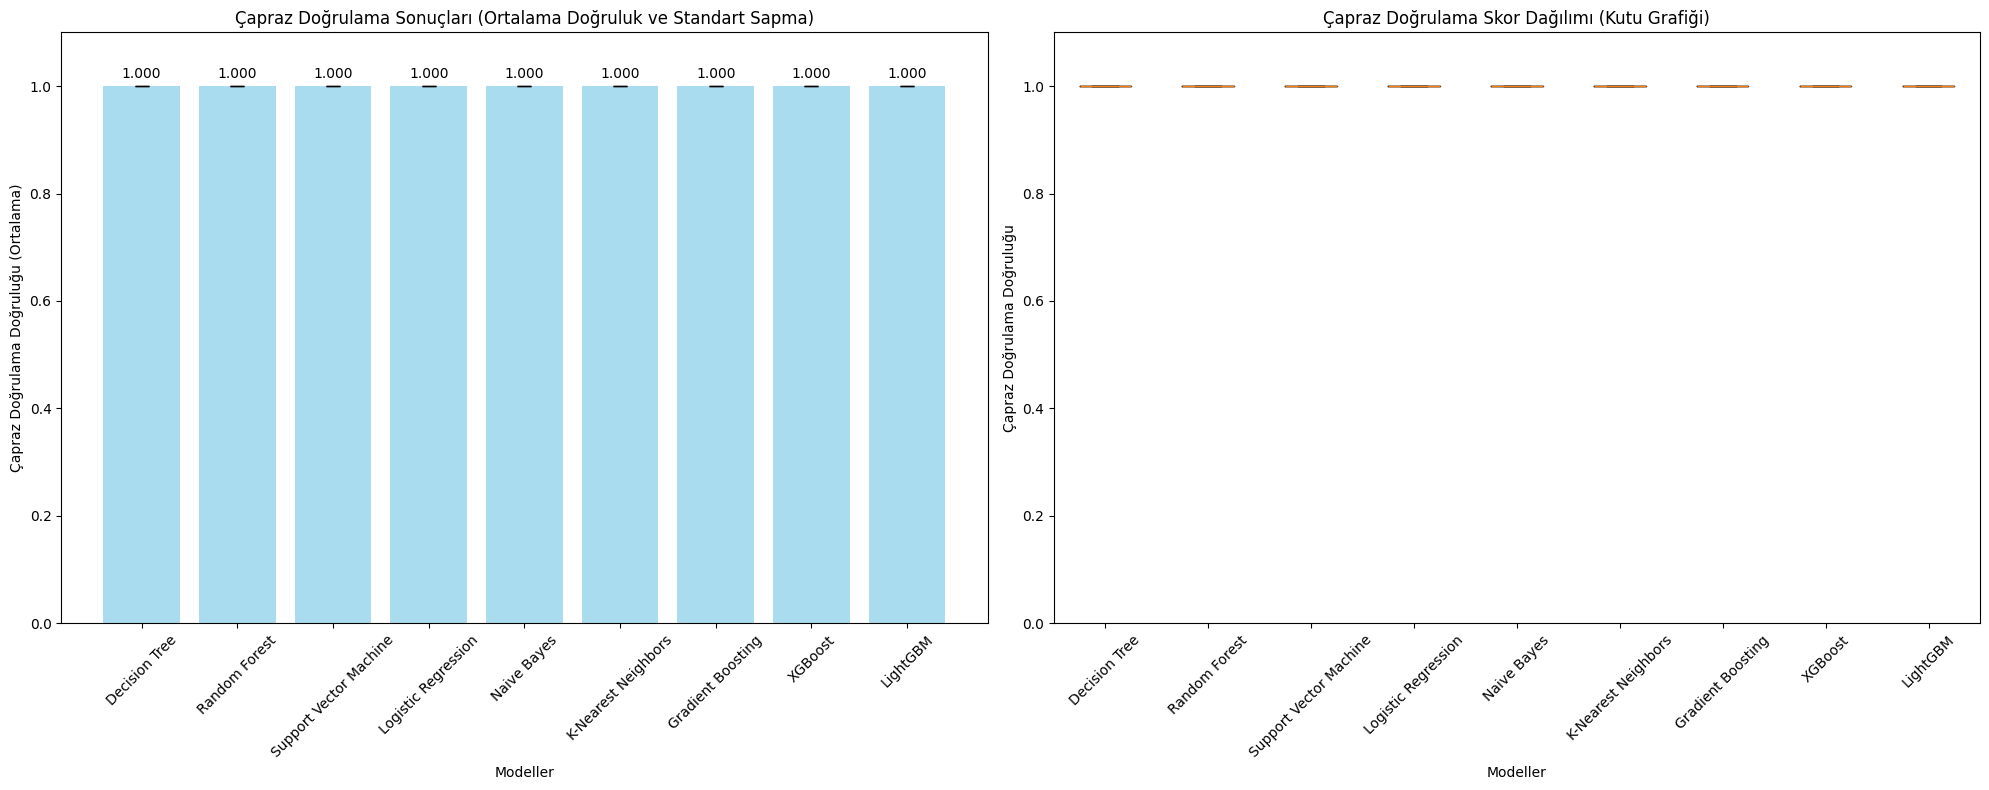


Çapraz Doğrulama Sonuç Tablosu:


,mean_accuracy,std_accuracy
Decision Tree,1.0,0.0
Random Forest,1.0,0.0
Support Vector Machine,1.0,0.0
Logistic Regression,1.0,0.0
Naive Bayes,1.0,0.0
K-Nearest Neighbors,1.0,0.0
Gradient Boosting,1.0,0.0
XGBoost,1.0,0.0
LightGBM,1.0,0.0


In [17]:
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


y_train_encoded = le.transform(y_train)


models_for_cv = {
  "Decision Tree": dt_model,
  "Random Forest": rf_model,
  "Support Vector Machine": svm_model,
  "Logistic Regression": lr_model,
  "Naive Bayes": nb_model,
  "K-Nearest Neighbors": knn_model,
  "Gradient Boosting": gb_model,
  "XGBoost": xgb_model,
  "LightGBM": lgb_model
}


cv_results = {}
cv_scores_all = {}

for model_name, model in models_for_cv.items():
  print(f"{model_name} için çapraz doğrulama uygulanıyor...")
  try:
    if model_name in ["XGBoost", "LightGBM"]:
      scores = cross_val_score(model, X_train, y_train_encoded, cv=5, scoring='accuracy')
    else:
      scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')

    cv_results[model_name] = {
      "mean_accuracy": np.mean(scores),
      "std_accuracy": np.std(scores)
    }
    cv_scores_all[model_name] = scores

    print(f"{model_name} Mean Accuracy (CV=5): {cv_results[model_name]['mean_accuracy']:.4f} (+/- {cv_results[model_name]['std_accuracy']:.4f})")
  except Exception as e:
    print(f"HATA: {model_name}: {e}")
    cv_results[model_name] = {
      "mean_accuracy": "Error",
      "std_accuracy": "Error"
    }

print("\nÇapraz Doğrulama Sonuçları:")
for model_name, results in cv_results.items():
  if results['mean_accuracy'] != "Error":
    print(f"{model_name}: Mean Accuracy={results['mean_accuracy']:.4f} (+/- {results['std_accuracy']:.4f})")


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))


valid_models = {k: v for k, v in cv_results.items() if v['mean_accuracy'] != "Error"}
model_names = list(valid_models.keys())
mean_accuracies = [valid_models[model]['mean_accuracy'] for model in model_names]
std_accuracies = [valid_models[model]['std_accuracy'] for model in model_names]


ax1.bar(model_names, mean_accuracies, yerr=std_accuracies, capsize=5, color='skyblue', alpha=0.7)
ax1.set_xlabel('Modeller')
ax1.set_ylabel('Çapraz Doğrulama Doğruluğu (Ortalama)')
ax1.set_title('Çapraz Doğrulama Sonuçları (Ortalama Doğruluk ve Standart Sapma)')
ax1.set_ylim(0, 1.1)
ax1.tick_params(axis='x', rotation=45)


for i, (mean_acc, std_acc) in enumerate(zip(mean_accuracies, std_accuracies)):
  ax1.text(i, mean_acc + std_acc + 0.01, f'{mean_acc:.3f}', ha='center', va='bottom')


cv_scores_df = pd.DataFrame(cv_scores_all)
ax2.boxplot(cv_scores_df.values, labels=cv_scores_df.columns)
ax2.set_xlabel('Modeller')
ax2.set_ylabel('Çapraz Doğrulama Doğruluğu')
ax2.set_title('Çapraz Doğrulama Skor Dağılımı (Kutu Grafiği)')
ax2.tick_params(axis='x', rotation=45)
ax2.set_ylim(0, 1.1)

plt.tight_layout()
plt.show()

cv_results_df = pd.DataFrame(cv_results).T



print("\nÇapraz Doğrulama Sonuç Tablosu:")

display(cv_results_df)